In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

In [2]:
# !pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

In [3]:
from tvDatafeed import TvDatafeed, Interval

In [4]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [5]:
n=48

In [6]:
bitcoi = tv.get_hist(symbol='BTCUSD', exchange='COINBASE', interval=Interval.in_1_hour, n_bars=5000)
bitcoi = bitcoi.reset_index()
dataTypeSeries = bitcoi.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)
bitcoin=bitcoi[:-n].copy()
bitcoin

Data type of each column of Dataframe :
datetime    datetime64[ns]
symbol              object
open               float64
high               float64
low                float64
close              float64
volume             float64
dtype: object


,datetime,symbol,open,high,low,close,volume
0,2021-07-06 09:00:00,COINBASE:BTCUSD,34415.32,34521.36,33300.00,34149.49,971.28639
1,2021-07-06 10:00:00,COINBASE:BTCUSD,34145.77,34245.54,33965.23,34149.58,627.52816
2,2021-07-06 11:00:00,COINBASE:BTCUSD,34141.96,34173.01,33874.80,34047.00,499.60595
3,2021-07-06 12:00:00,COINBASE:BTCUSD,34051.33,34150.00,33761.01,34058.69,455.98097
4,2021-07-06 13:00:00,COINBASE:BTCUSD,34058.71,34058.71,33526.05,33943.62,717.70456
...,...,...,...,...,...,...,...
4947,2022-01-28 11:00:00,COINBASE:BTCUSD,37212.81,37390.99,37023.42,37114.51,962.86397
4948,2022-01-28 12:00:00,COINBASE:BTCUSD,37110.34,37198.14,36781.77,36855.34,1128.10478
4949,2022-01-28 13:00:00,COINBASE:BTCUSD,36855.34,37140.87,36785.74,37059.30,1184.46908
4950,2022-01-28 14:00:00,COINBASE:BTCUSD,37057.06,37254.40,36772.98,37242.81,1052.02521


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pa

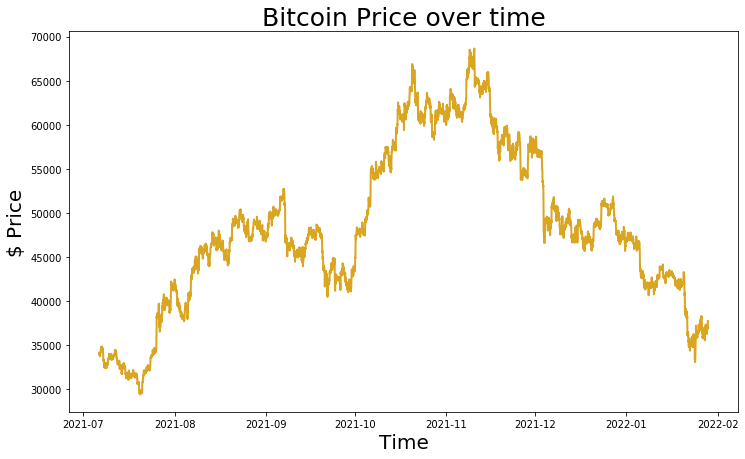

In [7]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["datetime"], bitcoin["close"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


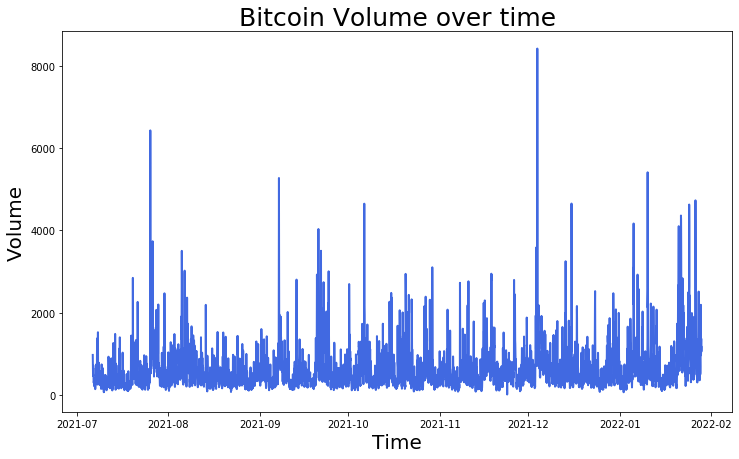

In [8]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["datetime"], bitcoin["volume"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [9]:
bitcoin.isnull().sum()

datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [10]:
required_features = ['open', 'high', 'low', 'volume']
output_label = 'close'

In [11]:
x_train, x_test, y_train, y_test = train_test_split(bitcoin[required_features],bitcoin[output_label],test_size = 0.2)

In [12]:
x_test

,open,high,low,volume
2229,54340.11,54450.00,53839.93,528.59737
3262,56934.38,57244.69,56532.57,415.77101
2237,54189.56,54246.19,53850.00,491.70001
636,39521.29,39794.23,39241.50,806.50115
2639,60262.97,60831.33,59809.01,837.99997
...,...,...,...,...
327,29615.66,29945.00,29507.80,1328.34805
3329,57520.48,57536.45,57100.16,325.87222
336,29709.84,29774.74,29453.52,1105.08928
486,39731.32,40593.93,39260.11,2874.00773


In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
model.score(x_test, y_test)

0.9997370920426627

In [15]:
future_set = bitcoin.tail(n).copy()
future_set

,datetime,symbol,open,high,low,close,volume
4904,2022-01-26 16:00:00,COINBASE:BTCUSD,37051.31,37211.93,36271.31,36357.35,1508.89758
4905,2022-01-26 17:00:00,COINBASE:BTCUSD,36353.14,36615.96,36254.97,36540.75,1015.09553
4906,2022-01-26 18:00:00,COINBASE:BTCUSD,36544.52,36927.90,36475.00,36840.63,926.39429
4907,2022-01-26 19:00:00,COINBASE:BTCUSD,36846.22,37107.45,36730.55,37035.01,1195.17645
4908,2022-01-26 20:00:00,COINBASE:BTCUSD,37040.08,37040.08,35844.00,35897.08,1371.28917
4909,2022-01-26 21:00:00,COINBASE:BTCUSD,35895.28,36053.65,35725.42,36042.97,1249.23020
4910,2022-01-26 22:00:00,COINBASE:BTCUSD,36040.64,36248.84,35530.07,35779.41,877.56454
4911,2022-01-26 23:00:00,COINBASE:BTCUSD,35776.84,36015.32,35722.00,35943.51,765.95033
4912,2022-01-27 00:00:00,COINBASE:BTCUSD,35943.51,36122.19,35840.00,35997.94,1127.54295
4913,2022-01-27 01:00:00,COINBASE:BTCUSD,35997.94,36181.23,35867.36,36146.98,659.50166


In [16]:
prediction = model.predict(future_set[required_features])
prediction

array([36661.50750025, 36462.47933957, 36773.95358148, 36939.95553512,
       36271.96426088, 35869.9647817 , 35863.32770511, 35896.6333389 ,
       35976.87966562, 36028.47246105, 36146.12747466, 36206.88697416,
       36499.31126262, 36473.32835562, 36697.41805238, 36628.67514463,
       36724.51720944, 37030.69871521, 36758.55138327, 36527.66138189,
       36322.01186092, 36137.52742771, 36076.39147336, 35934.41761299,
       36106.36783961, 36612.19968802, 37101.38014104, 37323.85530542,
       36911.85999954, 36786.0099755 , 37317.51267997, 37205.59073927,
       37222.21120906, 37245.68860676, 36951.65784649, 36606.25165737,
       36654.60186596, 36524.36337872, 36435.51917685, 36366.55437573,
       36801.00748773, 36835.54505685, 37153.73310366, 37197.41398513,
       36933.394539  , 36996.96196447, 37000.20453393, 37660.80187602])

In [17]:
import datetime
future_set["datetime"]=future_set["datetime"]+datetime.timedelta(hours=n)
future_set["predict"]=prediction
  
future_set

,datetime,symbol,open,high,low,close,volume,predict
4904,2022-01-28 16:00:00,COINBASE:BTCUSD,37051.31,37211.93,36271.31,36357.35,1508.89758,36661.507500
4905,2022-01-28 17:00:00,COINBASE:BTCUSD,36353.14,36615.96,36254.97,36540.75,1015.09553,36462.479340
4906,2022-01-28 18:00:00,COINBASE:BTCUSD,36544.52,36927.90,36475.00,36840.63,926.39429,36773.953581
4907,2022-01-28 19:00:00,COINBASE:BTCUSD,36846.22,37107.45,36730.55,37035.01,1195.17645,36939.955535
4908,2022-01-28 20:00:00,COINBASE:BTCUSD,37040.08,37040.08,35844.00,35897.08,1371.28917,36271.964261
4909,2022-01-28 21:00:00,COINBASE:BTCUSD,35895.28,36053.65,35725.42,36042.97,1249.23020,35869.964782
4910,2022-01-28 22:00:00,COINBASE:BTCUSD,36040.64,36248.84,35530.07,35779.41,877.56454,35863.327705
4911,2022-01-28 23:00:00,COINBASE:BTCUSD,35776.84,36015.32,35722.00,35943.51,765.95033,35896.633339
4912,2022-01-29 00:00:00,COINBASE:BTCUSD,35943.51,36122.19,35840.00,35997.94,1127.54295,35976.879666
4913,2022-01-29 01:00:00,COINBASE:BTCUSD,35997.94,36181.23,35867.36,36146.98,659.50166,36028.472461


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pa

Text(0, 0.5, '$ Price')

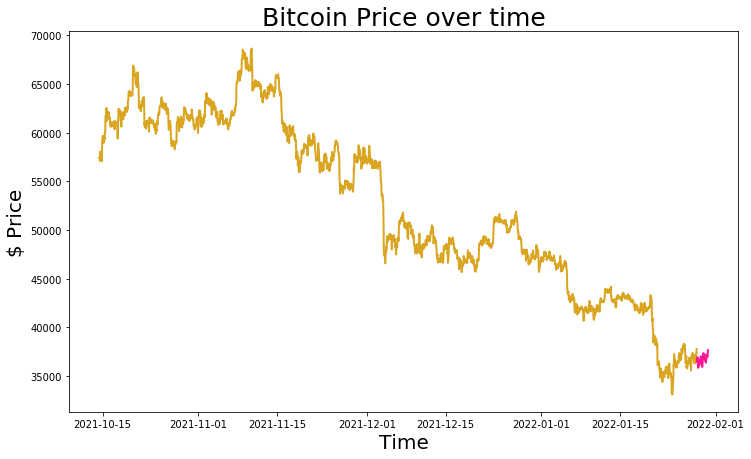

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["datetime"][2400:], bitcoin["close"][2400:], color='goldenrod', lw=2)
plt.plot(future_set["datetime"], future_set["predict"], color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

Text(0, 0.5, '$ Price')

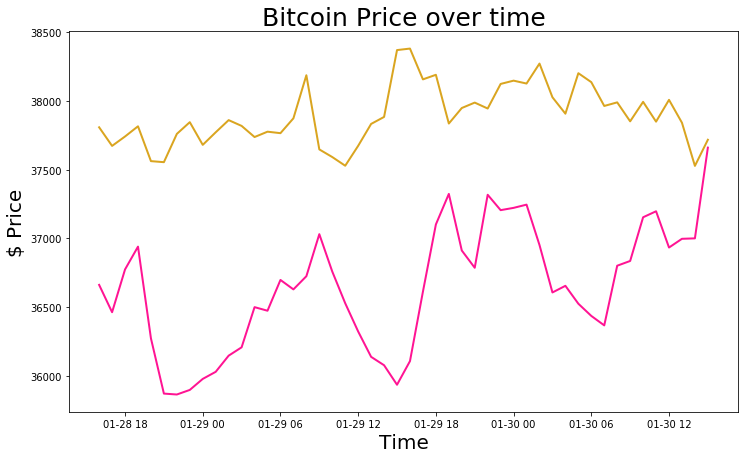

In [19]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoi["datetime"].tail(n), bitcoi["close"].tail(n), color='goldenrod', lw=2)
plt.plot(future_set["datetime"], future_set["predict"], color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [20]:
#calculate error
from sklearn.metrics import mean_squared_error
import numpy as np
mean_squared_error(np.array(bitcoi["close"].tail(n)), np.array(future_set["predict"]))
# np.array(bitcoi["close"].tail(n))
# np.array(future_set["predict"])

1785011.2640571669